In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from utils.Models import *

In [29]:
def calc_mse(runs, golden):
    for r in i.runs:
        if r.result:
            data.append(float(r.result))
        return np.square(np.subtract(data, golden)).mean()
    
def calc_psnr(runs, golden):
    # qual é o valor máximo que devo considerar aqui?
    return 0

def show_plot(data, stats, text):
    plt.figure()
    plt.suptitle(text)
    plt.title(stats)
    plt.xlabel("bit")
    plt.ylabel("absolute output error")
    ax = plt.gca()
    ax.invert_xaxis()
    plt.axhline(0)
    plt.grid()
    plt.bar(range(len(data)), data)

<ipython-input-29-705d072d01ee>:5: RuntimeWarning: overflow encountered in square
  return np.square(np.subtract(data, golden)).mean()


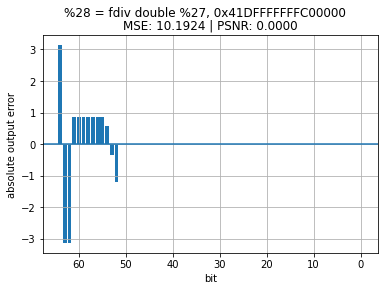

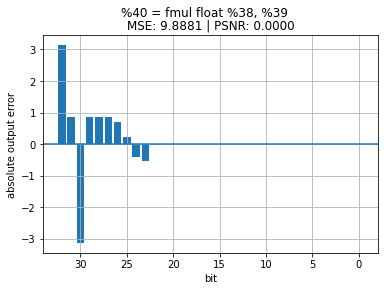

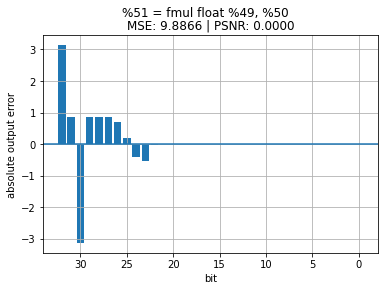

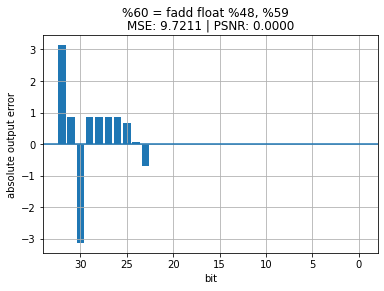

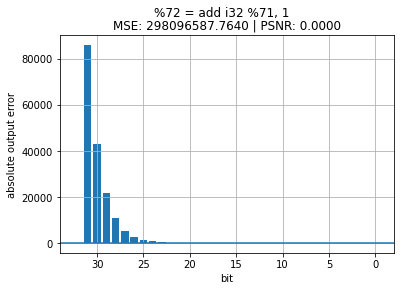

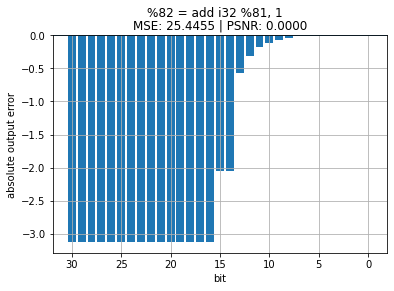

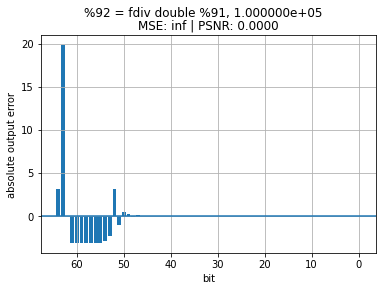

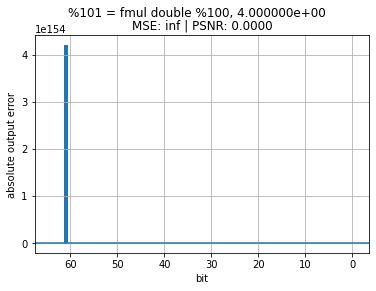

In [30]:
campaign = Campaign.select()[0]
golden = float(campaign.golden)

instructions = Instruction.select()

for i in instructions:
    data = []
    for r in i.runs:
        if r.result:
            data.append((float(r.result) - golden))
    stats = "MSE: {:.4f} | PSNR: {:.4f}".format(calc_mse(i.runs, golden), calc_psnr(i.runs, golden))
    show_plot(data, stats, i.text)